In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_path="Dataset/TRAIN"
test_path="Dataset/TEST"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
#visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})        

100%|██████████████████████████████████████████████████████████████████████████████| 9999/9999 [01:46<00:00, 93.79it/s]


In [5]:
data.shape

(22564, 2)

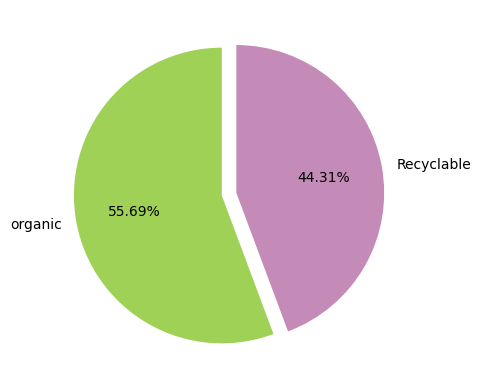

In [6]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','Recyclable'],autopct='%0.2f%%',colors =colors, startangle=90,explode=[0.05,0.05])
plt.show()

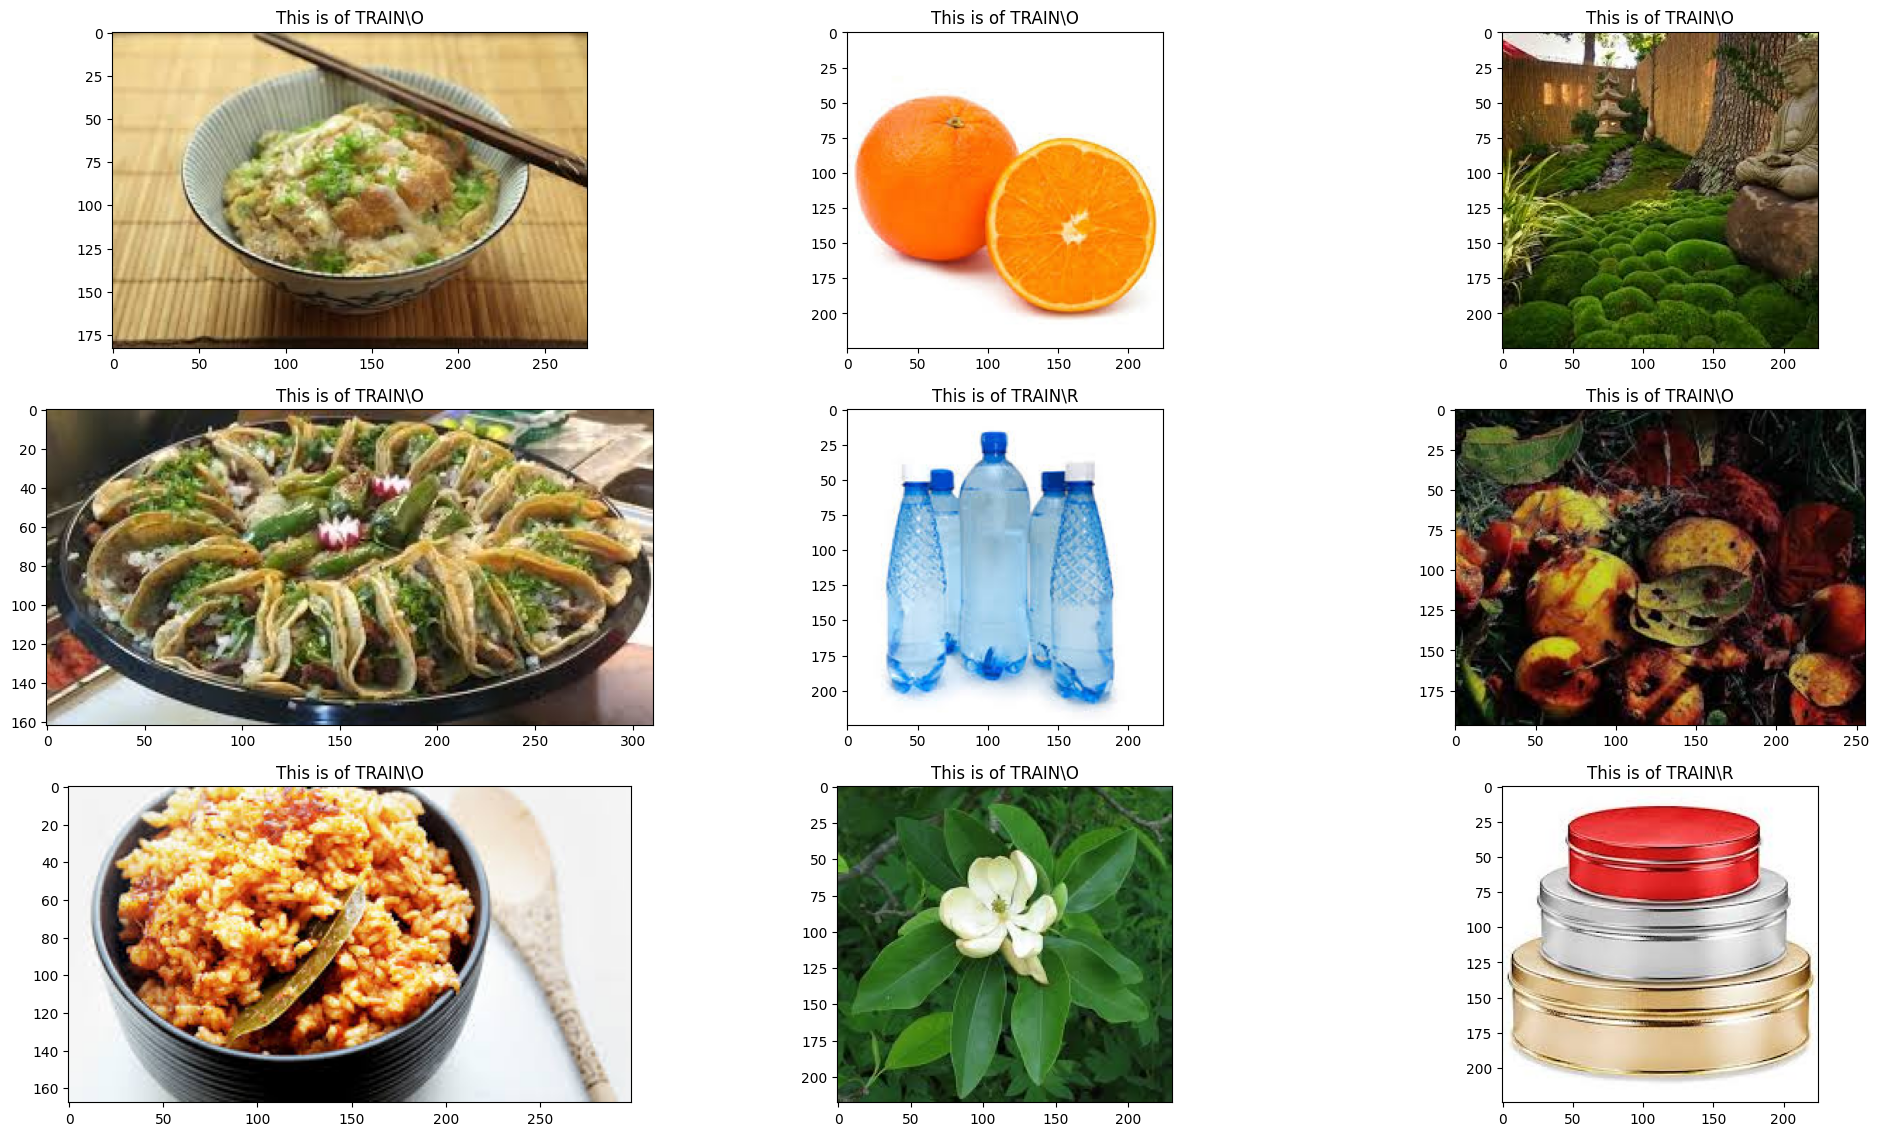

In [7]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title("This is of {0}".format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()
    

## CNN

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer ='adam',
             metrics=["accuracy"])
batch_size=256


model.summary()

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
 train_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
    
    
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 488s 5s/step - accuracy: 0.7032 - loss: 0.6087 - val_accuracy: 0.8480 - val_loss: 0.3730
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.8287 - loss: 0.4145 - val_accuracy: 0.8735 - val_loss: 0.3233
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.8473 - loss: 0.3723 - val_accuracy: 0.8766 - val_loss: 0.3009
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.8649 - loss: 0.3459 - val_accuracy: 0.9013 - val_loss: 0.2596
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.8757 - loss: 0.3149 - val_accuracy: 0.8902 - val_loss: 0.2942
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 399s 4s/step - accuracy: 0.8864 - loss: 0.2904 - val_accuracy: 0.8778 - val_loss: 0.3014
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.9014 - loss: 0.2506 - val_accuracy: 0.8882 - val_loss: 0.2821
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.9121 - loss: 0.2278 - val_accuracy: 0.8981 - v